<a href="https://colab.research.google.com/github/arthur422tp/arthur422/blob/master/%E7%94%9F%E6%88%90%E5%BC%8FAI%E4%BD%9C%E6%A5%AD%E4%BA%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

主題三

In [3]:
import numpy as np


def entropy(p):
    '''
    以下為手刻的entropy函數code
    '''
    p_array = np.array(p)   #確保輸入的p是一個np.array
    prob_distri_p = p_array / np.sum(p_array) #p必須是一個機率分布，考慮到之後想要以隨機方式生成p的array，在這裡對p先做一次normalization
    return np.sum(-prob_distri_p* np.log2(prob_distri_p)) #根據entropy函數的定義，回傳。

def kl_divergence(p, q):
    '''
    以下為手刻的kl_divergence函數code
    '''
    p_array = np.array(p)
    prob_distri_p = p_array / np.sum(p_array)
    q_array = np.array(q)
    prob_distri_q = q_array / np.sum(q_array)
    #同entropy函數的前置處理

    return np.sum(prob_distri_p * np.log2(prob_distri_p / prob_distri_q)) #根據kl_divergence的定義，回傳。

In [47]:
###最近太操電腦了，怕它罷工，隨機生成一維、長度為50的np.array就好
length = 50
p = np.random.rand(length)
q = np.random.rand(length)

In [38]:
###看看長怎樣
print(p)
print(q)

[0.4578892  0.66267191 0.74308073 0.11794186 0.79720023 0.49310327
 0.23080818 0.65194496 0.56951443 0.82706226 0.95459159 0.12488385
 0.66363695 0.88967681 0.68823766 0.05856594 0.54591535 0.40615217
 0.00482591 0.18653815 0.33509214 0.83475394 0.09873462 0.4378819
 0.17517404 0.78123352 0.58989714 0.65099183 0.38164161 0.21340506
 0.38345903 0.97172249 0.69569883 0.55498289 0.7529169  0.26094975
 0.32811424 0.41382443 0.29661036 0.92626154 0.61053512 0.05280354
 0.87952892 0.62573767 0.85748682 0.32351529 0.61329762 0.9077407
 0.82983261 0.30196386]
[0.01500284 0.14193253 0.96445821 0.84848553 0.79906158 0.39111001
 0.7021837  0.60415648 0.60923159 0.16619121 0.71366525 0.7914742
 0.95511084 0.81495286 0.0048938  0.1050497  0.71482116 0.96459937
 0.76572268 0.92168003 0.32567529 0.21145869 0.78582638 0.37828719
 0.22205751 0.14679031 0.70796124 0.36637489 0.61546288 0.1385317
 0.32671635 0.11323703 0.71249251 0.80669272 0.70474408 0.853248
 0.69696956 0.70854825 0.44132645 0.14343185

In [39]:
###看看成果
entropy(p)

5.4110434771539575

In [40]:
entropy(q)

5.350965897803884

In [41]:
kl_divergence(p, q)

0.8727599279554286

In [42]:
kl_divergence(q, p)


0.791239606153776

這邊可以注意到kl_divergence並沒有symmetric的性質。


下面作一些可視化的處理

In [43]:
prob_distri_p = p / np.sum(p)
prob_distri_q = q / np.sum(q)
kl_result = kl_divergence(prob_distri_p, prob_distri_q)
entropy_p = entropy(prob_distri_p)
entropy_q = entropy(prob_distri_q)

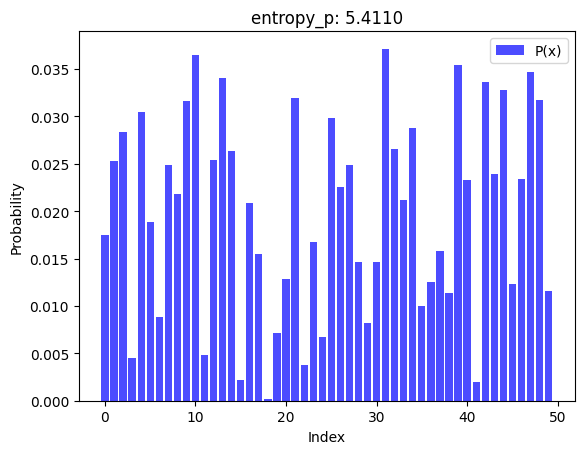

In [44]:
import matplotlib.pyplot as plt
plt.bar(range(len(prob_distri_p)), prob_distri_p, color = 'blue', alpha=0.7, label='P(x)')
plt.title(f'entropy_p: {entropy_p:.4f}')
plt.xlabel('Index')
plt.ylabel('Probability')
plt.legend()
plt.show()

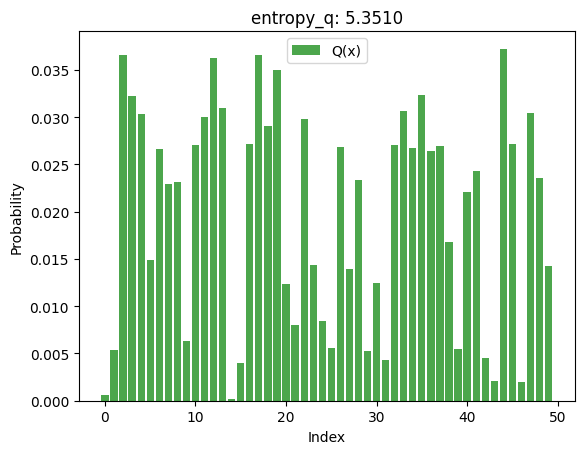

In [45]:
plt.bar(range(len(prob_distri_q)), prob_distri_q, color = 'green', alpha=0.7, label='Q(x)')
plt.title(f'entropy_q: {entropy_q:.4f}')
plt.xlabel('Index')
plt.ylabel('Probability')
plt.legend()
plt.show()

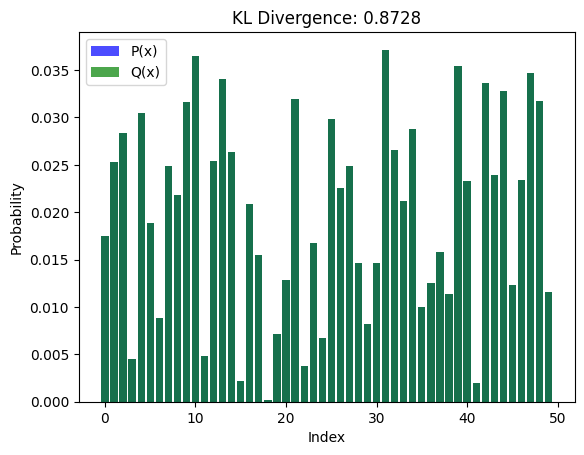

In [46]:
plt.bar(range(len(prob_distri_p)), prob_distri_p, color = 'blue',alpha=0.7, label='P(x)')
plt.bar(range(len(prob_distri_q)), prob_distri_p, color = 'green',alpha=0.7, label='Q(x)')
plt.title(f'KL Divergence: {kl_result:.4f}')
plt.xlabel('Index')
plt.ylabel('Probability')
plt.legend()
plt.show()